## 1. partition

### A partition of a graph is a separation of its nodes into disjoint groups. Consider the following graph:



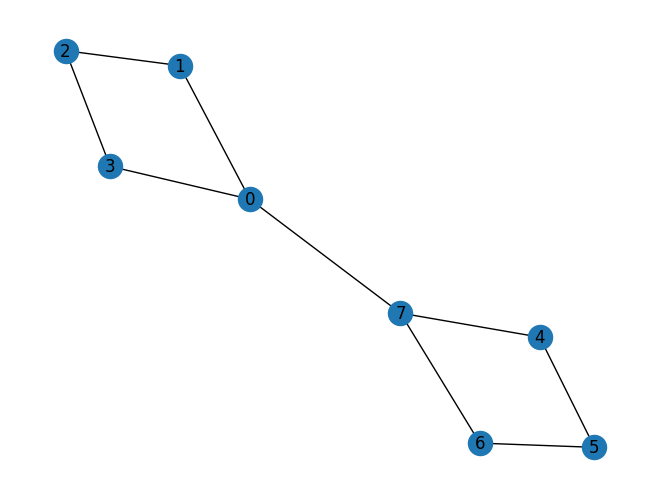

In [89]:
G = nx.Graph()
nx.add_cycle(G, [0, 1, 2, 3])
nx.add_cycle(G, [4, 5, 6, 7])
G.add_edge(0, 7)

nx.draw(G, with_labels=True)

In [90]:
partition = [
    {1, 2, 3},
    {4, 5, 6},
    {0, 7},
]

In [91]:
nx.community.is_partition(G, partition)


True

In [92]:
partition_map = {}
for idx, cluster_nodes in enumerate(partition):
    for node in cluster_nodes:
        partition_map[node] = idx

partition_map

{1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 0: 2, 7: 2}

In [93]:
partition_map[0] == partition_map[7]


True

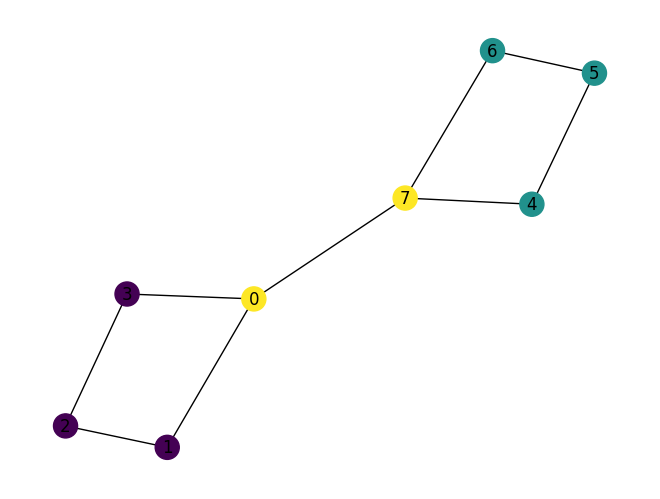

In [95]:
node_colors = [partition_map[n] for n in G.nodes]
        
nx.draw(G, node_color=node_colors, with_labels=True)

## 2. Modularity

In [96]:
def modularity(G, partition):
    W = sum(G.edges[v, w].get('weight', 1) for v, w in G.edges)
    summation = 0
    for cluster_nodes in partition:
        s_c = sum(G.degree(n, weight='weight') for n in cluster_nodes)
        # Use subgraph to count only internal links
        C = G.subgraph(cluster_nodes)
        W_c = sum(C.edges[v, w].get('weight', 1) for v, w in C.edges)
        summation += W_c - s_c ** 2 / (4 * W)
    
    return summation / W

In [97]:
modularity(G, partition)


0.2222222222222222

### Let's compare this to a partition we would suspect to have higher modularity:



In [98]:
partition_2 = [
    {0, 1, 2, 3},
    {4, 5, 6, 7},
]
modularity(G, partition_2)

0.3888888888888889

### NetworkX function


In [99]:
nx.community.quality.modularity(G, partition_2)


0.38888888888888884

## 3. Finding cliques

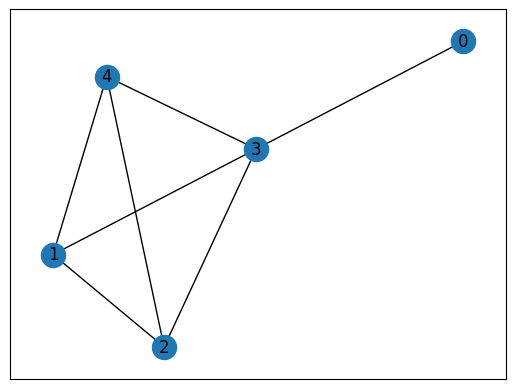

In [100]:
import networkx as nx
G1 = nx.Graph()
edges = [(1, 2), (2, 3), (1, 3), (3, 4), (3, 0),(1, 4),(4, 2)]
G1.add_edges_from(edges)
nx.draw_networkx(G1)

In [101]:
res = nx.find_cliques(G1)
cliques = [item for item in res]
cliques = sorted(cliques, key=lambda item: -len(item))
for item in cliques:
    print(item)

[3, 1, 2, 4]
[3, 0]


[4, 10, 12]

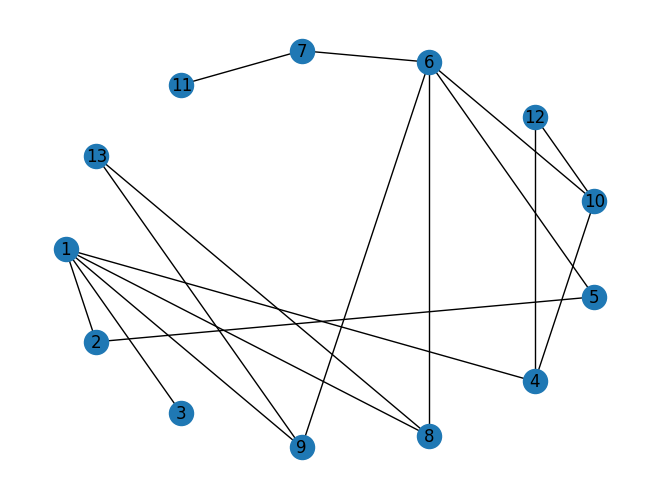

In [124]:
from networkx.algorithms.community import k_clique_communities

G = nx.Graph()
edges = [(1, 2),(1,3), (1,9), (1,8), (1,4), (2,5),(4,10),
         (4,12),(5,6),(6,7),(6,8),(6,9),(6,10),(7,11),(8,13),(9,13),(10,12)]


G.add_edges_from(edges)
nx.draw(G, with_labels = True,pos=nx.shell_layout(G))
c = list(k_clique_communities(G, 3))
sorted(list(c[0]))

In [103]:
import networkx as nx
import networkx.algorithms.community as nx_comm
nx_comm.louvain_communities(G, seed=123)

[{1, 2, 3, 5}, {4, 10, 12}, {7, 11}, {6, 8, 9, 13}]

## 4. Girvan-Newman Community Detection

In [106]:
import networkx.algorithms.community as nxcom
result = nxcom.girvan_newman(G)
communities = next(result)
len(communities)

2

In [107]:
# Set node and edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)

NameError: name 'set_node_community' is not defined

In [68]:
# Set community color for nodes
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = [get_color(G_karate.edges[e]['community']) for e in internal]

NameError: name 'G_karate' is not defined

## 4. Louvain method

In [110]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx
import math
import plotly.express as px
import pandas as pd
import numpy as np
import community as community_louvain


In [113]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import pandas as pd
import numpy as np
import math

# graph related library
import networkx as nx
import leidenalg
import igraph as ig


import community.community_louvain as cl
partition = cl.best_partition(G)

In [114]:
import community.community_louvain as community_louvain
import networkx.algorithms.community as nx_comm


In [115]:
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#EF9A9A", "#BA68C8", "#64B5F6", "#81C784",
              "#FFF176", "#BDBDBD"][:number_of_colors]
    node_colors = []
    
    # iterate each node in the graph and find which community it belongs to
    # if the current node is found at a specific community, add color to the 
    # node_colors list
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors

In [116]:
# convert the python-louvain package output to NetworkX package community function output format
def get_louvain_communities(graph, random_state=1):
    louvain_partition_dict = community_louvain.best_partition(graph, random_state=random_state)
    unique_partition_labels = list(set(louvain_partition_dict.values()))
    communities = [[] for i in range(len(unique_partition_labels))]
    for node in louvain_partition_dict.keys():
        communities[louvain_partition_dict[node]].append(node)
    return communities

In [117]:
# get communities using louvain algorithm
louvain_communities = get_louvain_communities(G, random_state=1)
louvain_communities

[[9, 8, 6, 7, 11, 13], [1, 2, 3, 5], [4, 10, 12]]

In [118]:
def visualize_communities(graph, communities):
    # create visualization
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx_comm.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, 
                           k=0.3, iterations=50,
                           seed=2)

    plt.figure(1,figsize=(10,6)) 
    nx.draw(graph,
            pos = pos,
            node_size=1000,
            node_color=node_colors,
            with_labels=True,
            font_size = 20,
            font_color='black')
    plt.title(title)
    plt.show() 

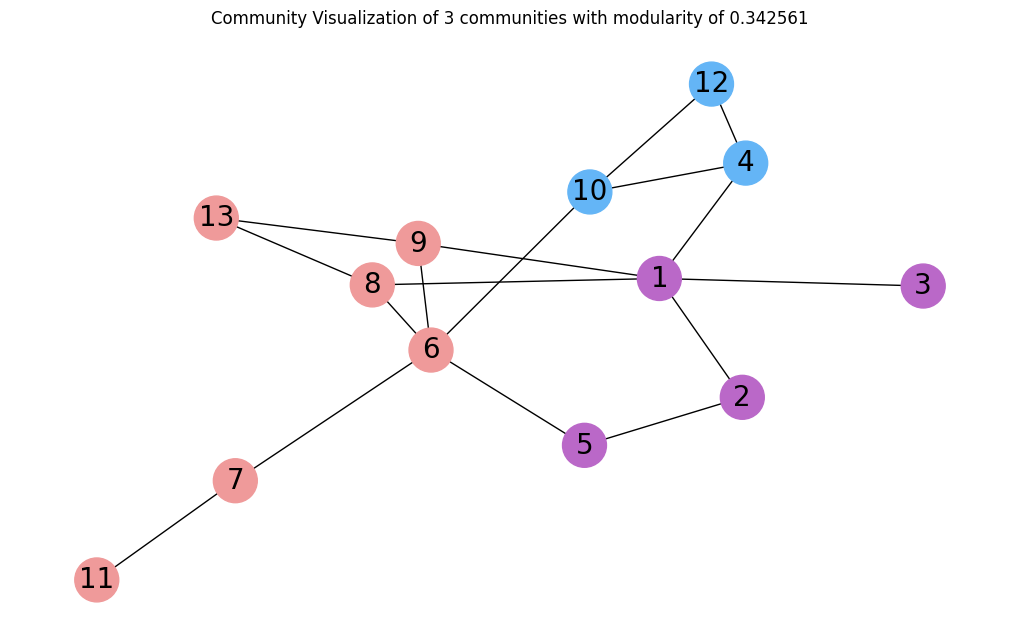

In [120]:
visualize_communities(G, louvain_communities)
